In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

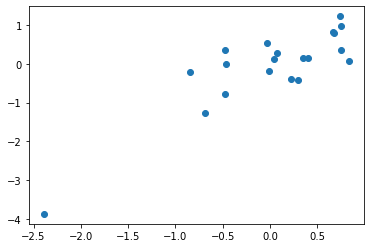

In [2]:
#Generating random samples for regression
x = torch.randn(20, 1)
y = x + torch.randn(20,1)/2
plt.scatter(x,y)
plt.show()

In [3]:
# Creating a simple sequential model with an input layer, an activation func and an output layer
model = nn.Sequential(nn.Linear(1,1), nn.ReLU(), nn.Linear(1,1))

In [4]:
#Seeing the model parameters
list(model.parameters())

[Parameter containing:
 tensor([[0.5381]], requires_grad=True),
 Parameter containing:
 tensor([0.4425], requires_grad=True),
 Parameter containing:
 tensor([[0.3950]], requires_grad=True),
 Parameter containing:
 tensor([-0.8699], requires_grad=True)]

In [5]:
x

tensor([[ 0.7523],
        [ 0.7436],
        [ 0.0411],
        [-2.3874],
        [ 0.4028],
        [-0.8438],
        [-0.0309],
        [ 0.0686],
        [-0.0138],
        [-0.4630],
        [ 0.7495],
        [ 0.6788],
        [ 0.2926],
        [ 0.2200],
        [ 0.6637],
        [ 0.8290],
        [-0.4756],
        [ 0.3486],
        [-0.4741],
        [-0.6907]])

In [6]:
#Scaling the data in the 0-1 range
x = (x-x.min())/(x.max()-x.min())
y = (y-y.min())/(y.max()-y.min())

In [7]:
#Initializing mean squared error loss function and an optimizer to use stochastic gradient descent for updating w
lossfunction = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [8]:
#Learning process
loss_history = [] #keep track of losses
for epoch in range(50):
    pred = model(x)
    loss = lossfunction(pred,y)
    loss_history.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[]

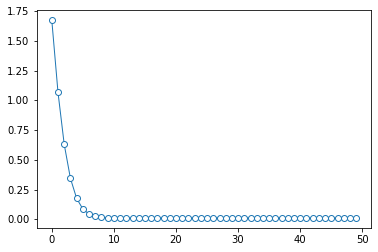

In [9]:
# Visualizing how the losses changed by plotting a chart of loss_history
plt.plot([x.detach() for x in loss_history], 'o-', markerfacecolor='w', linewidth=1)
plt.plot()

In [10]:
#Loss reduces as the model is trained for more epochs(until around 6th) and converges after a point(10th)

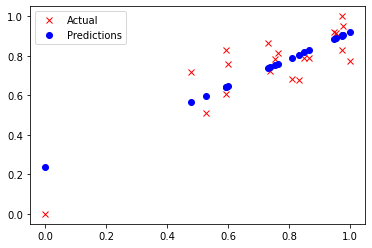

In [11]:
#The results produced by the system
predictions = model(x)
plt.plot(x, y, 'rx', label="Actual")
plt.plot(x, predictions.detach(), 'bo', label="Predictions")
plt.legend()
plt.show()

In [12]:
# This simple one-layer neural net might not always give best results. It is possible that the final regression line
# might not closely fit as might be expected. The model can be defined and trained multiple times to see the 
# difference due to random initialization.